In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from quant_met.bcs import graphene
from quant_met.configuration import Configuration
from quant_met import plotting

In [2]:
lattice_constant = np.sqrt(3)

basis = 0.5 * lattice_constant * np.array([[1, np.sqrt(3)],
                  [1, -np.sqrt(3)]])

bz_area = np.linalg.norm(np.cross(basis[0], basis[1]))
print(bz_area)

2.5980762113533156


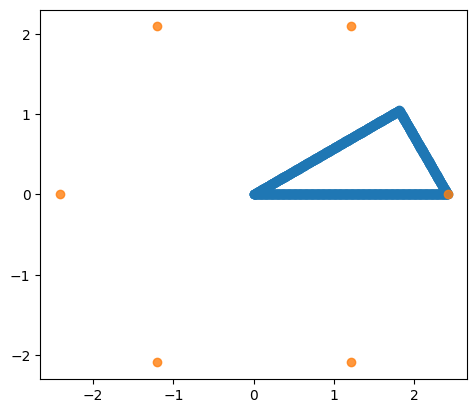

In [3]:
whole_path, whole_path_plot, ticks, labels = plotting.generate_bz_path(lattice_constant)

all_K_points = 4 * np.pi / (3 * lattice_constant) * np.array([
    (np.sin(i * np.pi / 6), np.cos(i * np.pi / 6)) for i in [1, 3, 5, 7, 9, 11]]
)

BZ_path_plot = plotting.plot_into_bz(all_K_points, whole_path)

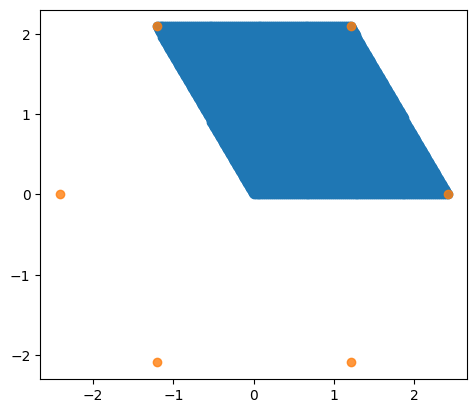

In [4]:
BZ_grid = graphene.generate_k_space_grid(100, 100, all_K_points[1], all_K_points[5])

BZ_grid_plot = plotting.plot_into_bz(all_K_points, BZ_grid)

/Users/tjark/miniconda3/envs/quant-met-dev/lib/python3.12/site-packages/scipy/optimize/_root_scalar.py:315: RuntimeWarning: Derivative was zero.
  r, sol = methodc(f, x0, args=args, fprime=fprime, fprime2=None,


0
Time taken to solve the gap equation: 0.78 seconds


ValueError: 'c' argument has 1 elements, which is inconsistent with 'x' and 'y' with size 10000.

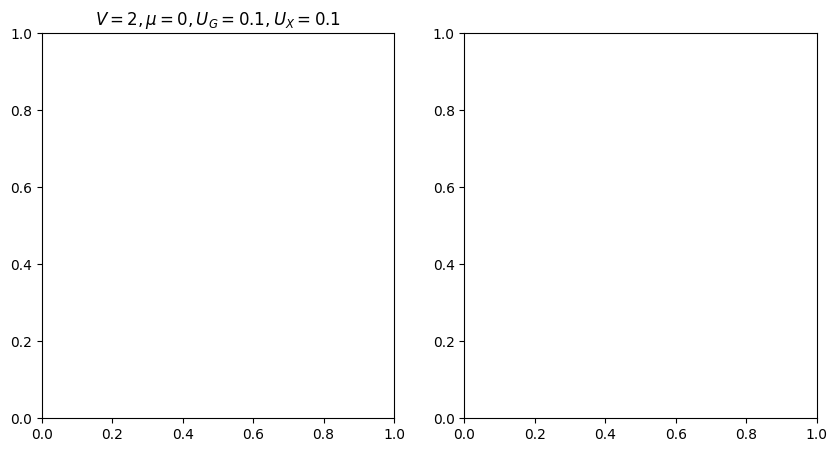

In [6]:
import time

config = Configuration(t_gr=1, t_x=0, a=lattice_constant, U_Gr=0.1, U_X=0.1, V=2, mu=0, beta=100000, filling=0.98)

start = time.time()
delta = graphene.solve_gap_equation(config, BZ_grid)
print(delta)
end = time.time()
print(f'Time taken to solve the gap equation: {end - start:0.2f} seconds')
#delta_interpolated = graphene.interpolate_gap(delta, whole_path)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(2*5, 5))

#for delta, ax in zip(delta.data[['delta_1', 'delta_2']].to_numpy().T, axs):
for delta, ax in zip([delta, delta], axs):
    ax.set_title(f"$V = {config.V}, \\mu = {config.mu}, U_G = {config.U_Gr}, U_X = {config.U_X}$")
    plotting.scatter_into_bz(all_K_points, BZ_grid, delta, fig=fig, ax=ax)

In [7]:
delta_over_U = []

U_range = np.linspace(start=0, stop=3, num=20)

for U in U_range:
    config = Configuration(t_gr=1, t_x=0, a=lattice_constant, U_Gr=U, U_X=2.2, V=2, mu=0, beta=100000, filling=0.98)

    start = time.time()
    #try:
    #delta, mu = graphene.solve_gap_equation(config, BZ_grid)
    delta = graphene.solve_gap_equation(config, BZ_grid)
    #print(delta)
    end = time.time()
    print(f'Time taken to solve the gap equation: {end - start:0.2f} seconds')
    #print(f"mu = {mu}")
    #delta_over_U.append(delta.data.loc[0, 'delta_1'])
    delta_over_U.append(delta)
    #except RuntimeError:
    #    delta_over_U.append(0)

Time taken to solve the gap equation: 0.25 seconds
Time taken to solve the gap equation: 0.92 seconds
Time taken to solve the gap equation: 0.91 seconds
Time taken to solve the gap equation: 0.91 seconds
Time taken to solve the gap equation: 1.08 seconds
Time taken to solve the gap equation: 1.08 seconds
Time taken to solve the gap equation: 1.08 seconds
Time taken to solve the gap equation: 1.25 seconds
Time taken to solve the gap equation: 1.25 seconds
Time taken to solve the gap equation: 1.25 seconds
Time taken to solve the gap equation: 1.42 seconds
Time taken to solve the gap equation: 1.42 seconds
Time taken to solve the gap equation: 1.59 seconds
Time taken to solve the gap equation: 1.76 seconds
Time taken to solve the gap equation: 2.09 seconds
Time taken to solve the gap equation: 3.92 seconds
Time taken to solve the gap equation: 8.43 seconds
Time taken to solve the gap equation: 1.45 seconds
Time taken to solve the gap equation: 1.10 seconds
Time taken to solve the gap equ

Text(0.5, 0, 'U/t')

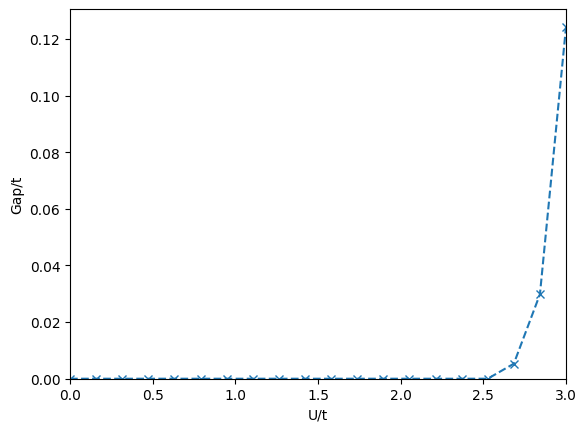

In [8]:
plt.plot(U_range, np.abs(delta_over_U), 'x--')
#plt.plot(U_range, np.array(U_range) / 2, alpha=0.5, color='black')
#plt.plot(U_range, np.array(U_range) - 2.13, alpha=0.5, color='black')
plt.ylim(bottom=0)
plt.xlim(left=0, right=3)
plt.ylabel("Gap/t")
plt.xlabel("U/t")

Text(0.5, 1.0, '$V = 2, \\mu = 0.4$')

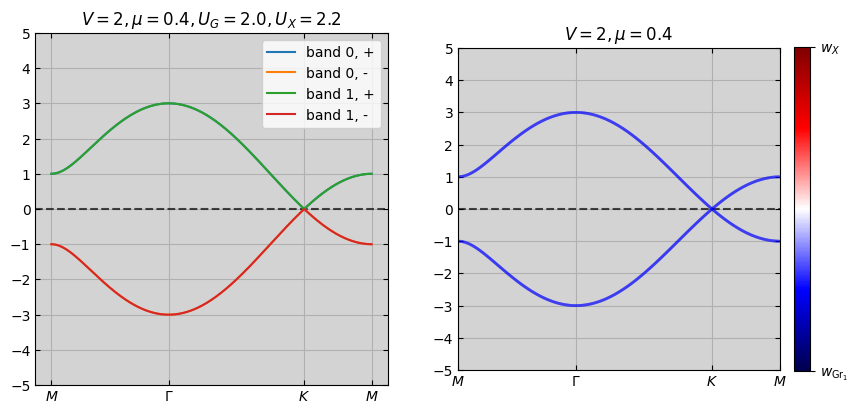

In [25]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(2*5, 5))

energies_on_bandpath, _ = graphene.generate_bloch(whole_path, config)

plotting.plot_bcs_bandstructure(energies_on_bandpath.T, delta_interpolated.data[['delta_1', 'delta_2']].to_numpy().T, whole_path_plot, ticks, labels, fig, axs[0])
axs[0].set_title(f"$V = {config.V}, \\mu = {config.mu}, U_G = {config.U_Gr}, U_X = {config.U_X}$")

band_structure = graphene.calculate_bandstructure(config, whole_path)
bands = band_structure[['band_1', 'band_2']].to_numpy().T
overlaps = band_structure[['wx_1', 'wx_2']].to_numpy().T
plotting.plot_nonint_bandstructure(bands, overlaps, whole_path_plot, ticks, labels, fig, axs[1])
axs[1].set_title(f"$V = {config.V}, \\mu = {config.mu}$")